# Creating synthetic attrition data with the Python Faker library for attrition predictive modelling

Composition of the dataset for predictive purposes:
- unique employee numbers to serve as index column
- department (HR, Finance, Marketing, Sales, IT, Customer Service, Legal, Project Management)
- province (in Canada)
- hierarchy level (individual contributor, manager/director, senior leadership)
- tenure with the current company (in years)
- previous experience (in years)
- hiring source (agency, direct, employee referral)
- promoted or not yet promoted
- resigned or stayed
- gender (male, female, non-binary)
- ethnicity (caucasian, african descent, indigenous, bi-racial, hispanic, pacific islander, middle eastern, asian)

In [1]:
# importing data creation libraries
from faker import Faker
from faker.providers import DynamicProvider
from random import choices
import random

# data manipulation & analysis libraries
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating a Canadian Faker instance
fake= Faker(locale= 'en_CA')

# creating the list of hierarchy levels with their weights
hierarchy_pool = ["Individual contributor","Manager/Director","Senior Leadership"]
h_wts=[0.79,0.16,0.05]

# instancing the dynamic provider
hierarchy_level = DynamicProvider(provider_name="level",
                                  elements=choices(hierarchy_pool,
                                                   weights=h_wts,
                                    k=len(hierarchy_pool)))

# adding the new provider to the Faker instance
fake.add_provider(hierarchy_level)

# creating the list of genders with their weights
gender_pool = ["male","female","non-binary"]
g_wts=[0.49,0.49,0.02]

# instancing the dynamic provider
gender = DynamicProvider(provider_name="gender",
                                  elements=choices(gender_pool,
                                                   weights=g_wts,
                                    k=len(gender_pool)))

# adding the new provider to the Faker instance
fake.add_provider(gender)

# creating the list of ethnicities with their weights
ethnicity_pool = ["caucasian", "african descent", "indigenous", "bi-racial",\
                  "hispanic", "pacific islander", "middle eastern", "asian"]
e_wts=[0.61,0.04,0.06,0.03,0.03,0.01,0.02,0.2]

# instancing the dynamic provider
ethnicity = DynamicProvider(provider_name="ethnicity",
                                  elements=choices(ethnicity_pool,weights=e_wts,
                                    k=len(ethnicity_pool)))

# adding the new provider to the Faker instance
fake.add_provider(ethnicity)

# creating the list of hiring sources with their weights
source_pool = ["agency", "direct", "referral"]
s_wts=[0.2, 0.5, 0.3]

# instancing the dynamic provider
source = DynamicProvider(provider_name="source",
                                  elements=choices(source_pool,
                                                   weights=s_wts,
                                    k=len(source_pool)))

# adding the new provider to the Faker instance
fake.add_provider(source)

In [3]:
# creating a function to generate employee records
def create_employees(num_employees):
    employee_list = []
    for i in range(1, num_employees):
        employee = {}
        employee['ee#'] = 10000000+i
        employee['department'] = fake.random_element(
            elements=("HR","Finance","Marketing","Sales",
                      "IT","Customer Service","Legal",
                      "Project Management"))
        employee['province'] = fake.province()
        employee['level'] = fake.level()
        employee['tenure'] = round(random.uniform(0,30),1)
        employee['previous_xp'] = round(random.uniform(0,30),1)    
        employee['gender'] = fake.gender()
        employee['ethnicity'] = fake.ethnicity()
        employee['hire_source'] = fake.source()
        employee['promotion'] = fake.random_element(
            elements= ("promoted", "not_promoted"))
        employee['status'] = fake.random_element(
            elements= ("resigned", "active"))
        employee_list.append(employee)
    return pd.DataFrame(employee_list)

In [4]:
# creating a dataframe to hold the output of the function
# and visualize it to check for correct output
attrition = create_employees(5000)
print(attrition.columns)
attrition.sample(n=5)

Index(['ee#', 'department', 'province', 'level', 'tenure', 'previous_xp',
       'gender', 'ethnicity', 'hire_source', 'promotion', 'status'],
      dtype='object')


,ee#,department,province,level,tenure,previous_xp,gender,ethnicity,hire_source,promotion,status
2961,10002962,Finance,New Brunswick,Individual contributor,15.4,28.4,male,caucasian,referral,promoted,resigned
3140,10003141,Project Management,Newfoundland and Labrador,Individual contributor,22.5,19.6,male,hispanic,agency,not_promoted,resigned
4075,10004076,Finance,Ontario,Individual contributor,26.1,29.4,female,hispanic,referral,not_promoted,active
4224,10004225,Marketing,Newfoundland and Labrador,Individual contributor,3.7,10.9,male,bi-racial,direct,promoted,resigned
1546,10001547,Sales,Northwest Territories,Individual contributor,24.6,7.3,male,caucasian,direct,not_promoted,active


## Exploratory data analysis

In [6]:
# categorical data profiling with formatted outputs
def category_profiling(df, cat_columns):
    print(df.nunique())
    print("---")
    print(df.dtypes)
    print("---")
    for col in cat_columns:
        percentages = df[col].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
        print(percentages)
        print("---")

cat_columns = ['department', 'province', 'level', 'gender', 'ethnicity', 'hire_source', 'promotion', 'status']

category_profiling(attrition, cat_columns)

ee#            4999
department        8
province         13
level             1
tenure          301
previous_xp     301
gender            2
ethnicity         6
hire_source       3
promotion         2
status            2
dtype: int64
---
ee#              int64
department      object
province        object
level           object
tenure         float64
previous_xp    float64
gender          object
ethnicity       object
hire_source     object
promotion       object
status          object
dtype: object
---
department
HR                    13.6%
Customer Service      13.1%
Legal                 12.6%
IT                    12.5%
Marketing             12.4%
Finance               12.4%
Project Management    11.9%
Sales                 11.5%
Name: proportion, dtype: object
---
province
Nova Scotia                  8.5%
British Columbia             8.1%
Nunavut                      8.1%
Yukon Territory              8.1%
Quebec                       8.0%
Northwest Territories        7.9%
Prince E

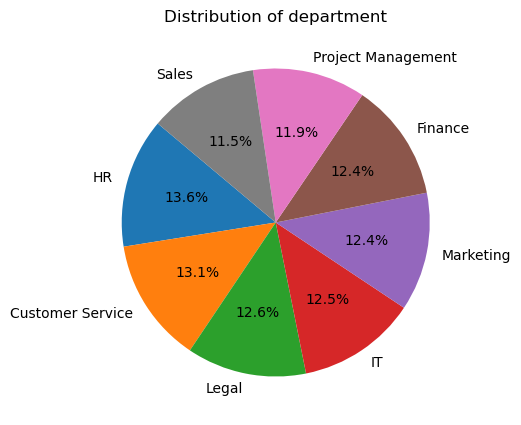

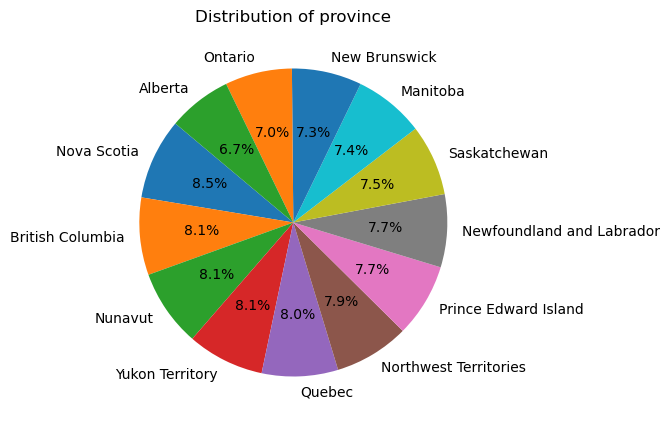

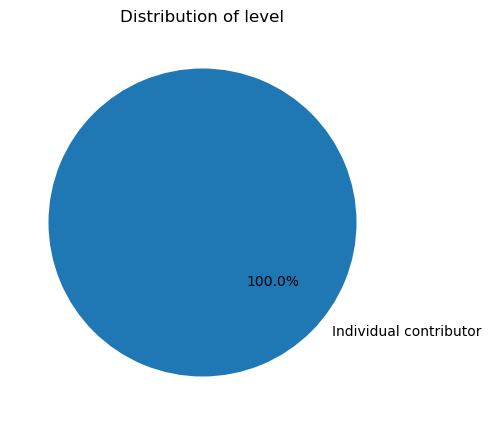

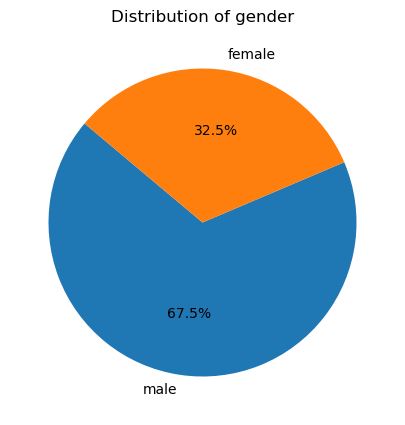

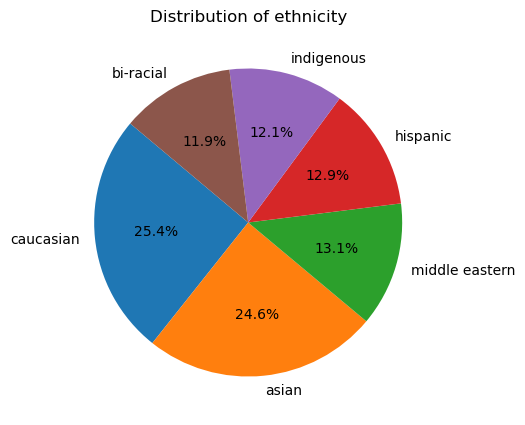

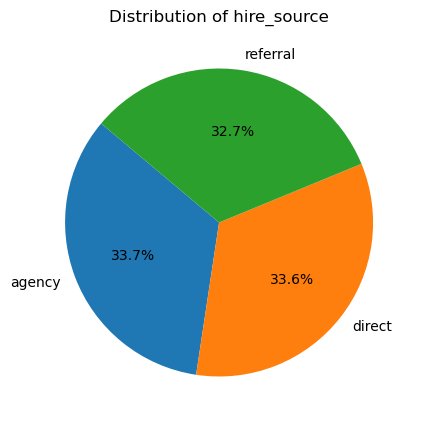

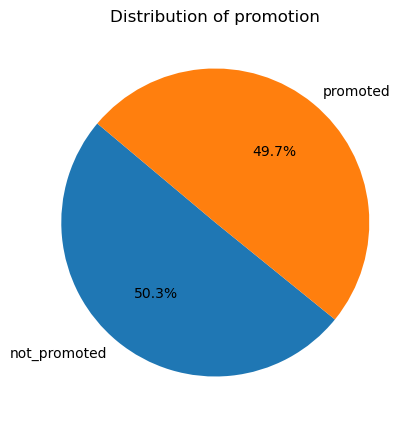

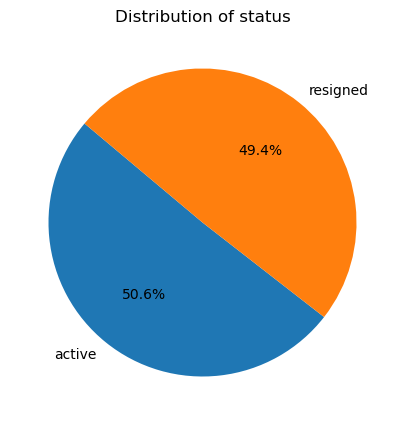

In [7]:
# plotting categorical columns' distributions
def cat_distribution_plots(data, cat_columns):
    for col in cat_columns:
        graph_data= data[col].value_counts()

        plt.figure(figsize= (10,5))
        plt.pie(graph_data.values,
                labels= graph_data.index,
                autopct= '%1.1f%%',
                startangle= 140)
        plt.title(f'Distribution of {col}')
        plt.show()

cat_distribution_plots(attrition, cat_columns)

In [8]:
# numerical data profiling with formatted outputs
def numerical_profiling(df,num_columns):
    for col in num_columns:
        column = df[col]
        stats = {
            "min": column.min(),
            "max": column.max(),
            "avg": column.mean().round(0),
            "stdev": column.std(),
            "1st quartile": np.percentile(a= column, q= 25),
            "2nd quartile": np.percentile(a= column, q= 50),
            "3rd quartile": np.percentile(a= column, q= 75),
            "skew": skew(column, axis=0, bias=True),
            "kurtosis": kurtosis(column, axis=0, 
                                 fisher=True, bias=True)}
        
        print(f"Statistics for {col.capitalize()}:")
        for stat, value in stats.items():
            print(f"{stat}: {value}")
        print("---")

num_columns = ['tenure', 'previous_xp']

numerical_profiling(attrition, num_columns)

Statistics for Tenure:
min: 0.0
max: 30.0
avg: 15.0
stdev: 8.687804974130392
1st quartile: 7.8
2nd quartile: 15.3
3rd quartile: 22.7
skew: -0.030067752633475497
kurtosis: -1.1934902839984016
---
Statistics for Previous_xp:
min: 0.0
max: 30.0
avg: 15.0
stdev: 8.787045171201258
1st quartile: 7.2
2nd quartile: 14.9
3rd quartile: 22.7
skew: 0.011071058364851272
kurtosis: -1.2209692223637747
---


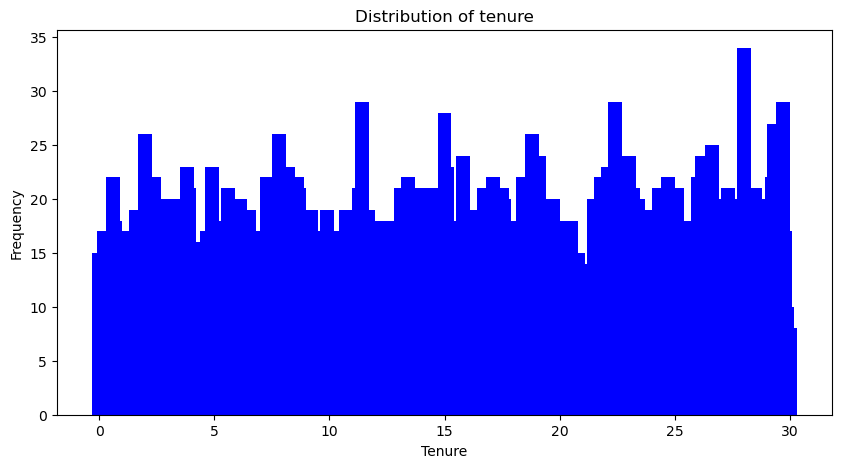

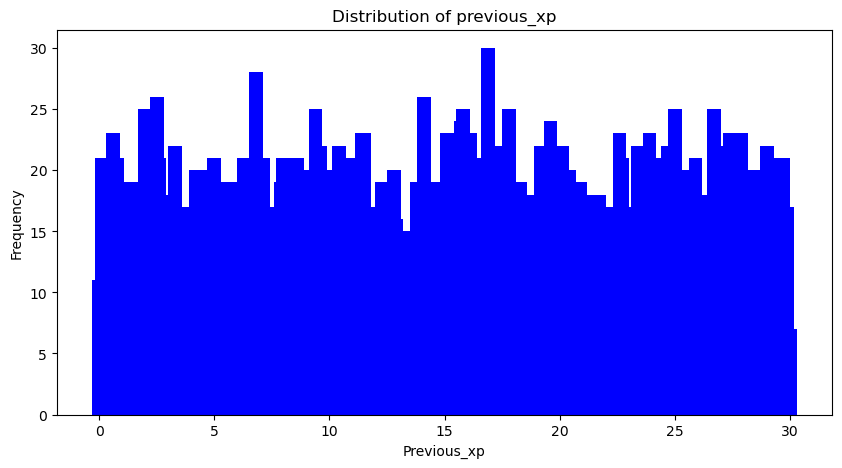

In [9]:
# plotting numerical columns' distributions
def num_distribution_plots(data, num_columns):
    for col in num_columns:
        graph_data = data[col].value_counts().sort_index()

        plt.figure(figsize= (10,5))
        plt.bar(graph_data.index,
                graph_data.values,
                color= 'blue',
                width= 0.6)
        plt.xlabel(col.capitalize())
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.show()

num_distribution_plots(attrition, num_columns)

## Exporting the dataframe as a .csv file

In [10]:
# export the dataframe to .csv file
attrition.to_csv('attrition_df.csv',index=False)